In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [201]:
import warnings
warnings.filterwarnings("ignore")

In [202]:
path = "/Users/marcelgrossmann/Documents/Project/MLCoursera/Dataset/fetal_health.csv"

In [203]:
data = pd.read_csv(path)
data.dtypes.value_counts()

float64    22
Name: count, dtype: int64

### Exploring the data set

In [204]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [205]:
data.sample(5)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
2120,140.0,0.000,0.000,0.005,0.001,0.0,0.0,77.0,0.7,17.0,...,124.0,155.0,2.0,0.0,145.0,143.0,145.0,2.0,0.0,1.0
1243,115.0,0.006,0.000,0.007,0.000,0.0,0.0,24.0,1.4,0.0,...,102.0,153.0,0.0,0.0,112.0,120.0,121.0,16.0,0.0,1.0
674,140.0,0.010,0.000,0.001,0.000,0.0,0.0,57.0,1.3,0.0,...,50.0,188.0,4.0,0.0,176.0,164.0,169.0,31.0,1.0,1.0
1395,142.0,0.000,0.000,0.006,0.000,0.0,0.0,58.0,0.4,31.0,...,141.0,163.0,2.0,0.0,155.0,153.0,155.0,1.0,0.0,2.0
88,139.0,0.000,0.009,0.000,0.000,0.0,0.0,62.0,0.7,27.0,...,73.0,184.0,4.0,0.0,148.0,147.0,148.0,2.0,1.0,1.0


In [206]:
data.tail()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
2121,140.0,0.000,0.000,0.007,0.0,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.0,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.0,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.0,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0
2125,142.0,0.002,0.002,0.008,0.0,0.0,0.0,74.0,0.4,36.0,...,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,1.0


In [207]:
data.corr().abs()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,0.080560,0.033436,0.146373,0.159032,0.053518,0.104597,0.305570,0.279607,0.285630,...,0.361619,0.275110,0.113933,0.004745,0.708993,0.723121,0.789246,0.133938,0.293503,0.148151
accelerations,0.080560,1.000000,0.048235,0.089674,0.108615,0.043018,0.127749,0.279577,0.207170,0.373943,...,0.154286,0.394147,0.190452,0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,0.364066
fetal_movement,0.033436,0.048235,1.000000,0.068779,0.049228,0.010976,0.265922,0.103715,0.121314,0.074096,...,0.153917,0.099853,0.164654,0.017749,0.061192,0.089671,0.072329,0.179340,0.001541,0.088010
uterine_contractions,0.146373,0.089674,0.068779,1.000000,0.285079,0.006788,0.077036,0.232811,0.289679,0.306608,...,0.113323,0.122766,0.082693,0.057894,0.104854,0.187505,0.140287,0.238582,0.072314,0.204894
light_decelerations,0.159032,0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,0.119152,0.562170,0.271282,...,0.553534,0.218043,0.397620,0.235296,0.347233,0.527354,0.388586,0.564289,0.000072,0.058870
severe_decelerations,0.053518,0.043018,0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,0.030770,...,0.071974,0.021135,0.007024,0.043441,0.215161,0.158673,0.160451,0.136421,0.070483,0.131934
prolongued_decelerations,0.104597,0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,0.137333,...,0.276764,0.120221,0.222860,0.056423,0.436416,0.488663,0.444778,0.503301,0.215405,0.484859
abnormal_short_term_variability,0.305570,0.279577,0.103715,0.232811,0.119152,0.033949,0.046226,1.000000,0.430705,0.459413,...,0.275378,0.111806,0.167561,0.149296,0.058363,0.074554,0.119960,0.146434,0.005748,0.471191
mean_value_of_short_term_variability,0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,0.430705,1.000000,0.470259,...,0.622569,0.409072,0.501430,0.266183,0.307586,0.445401,0.336109,0.555852,0.066140,0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,0.373943,0.074096,0.306608,0.271282,0.030770,0.137333,0.459413,0.470259,1.000000,...,0.422834,0.283183,0.279301,0.121784,0.165211,0.222321,0.186480,0.281536,0.042481,0.426146


limit_output extension: Maximum message size of 10000 exceeded with 35416 characters

The dataset gives us a clue that it is divided into 3 groups which survices that we consider n_clusters to be 4. However for experimental purposes, we would try to find this ourselves using elbow method if possible.

* K-Means without PCA.

In [208]:
clusters = list(range(1, 8))
inertia = []
for cluster in clusters:
    km = KMeans(n_clusters=cluster)
    km.fit(data)
    inertia.append(round(km.inertia_))

Text(0, 0.5, 'Inertia')

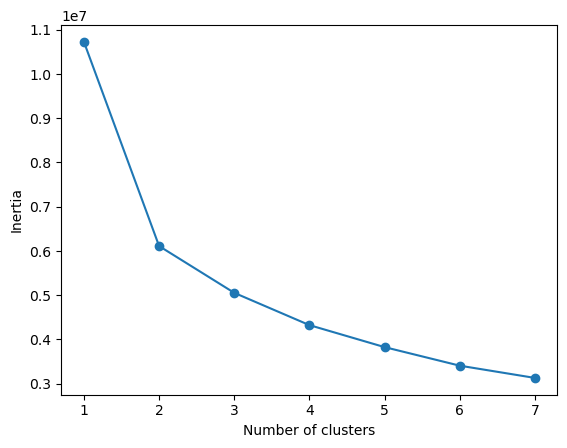

In [209]:
plt.plot(clusters, inertia)
plt.scatter(clusters, inertia)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

In [210]:
km = KMeans(n_clusters=3)
km.fit(data)

KMeans(n_clusters=3)

In [211]:
data["kmeans"] = km.labels_

In [212]:
data.kmeans.value_counts()

kmeans
1    1011
2     831
0     284
Name: count, dtype: int64

In [213]:
data.sample(20)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,kmeans
593,120.0,0.004,0.010,0.004,0.000,0.0,0.000,37.0,1.5,0.0,...,174.0,4.0,0.0,119.0,132.0,128.0,51.0,0.0,1.0,2
1668,110.0,0.002,0.000,0.007,0.001,0.0,0.000,63.0,0.8,0.0,...,156.0,3.0,0.0,112.0,113.0,113.0,14.0,-1.0,1.0,2
460,120.0,0.003,0.002,0.002,0.000,0.0,0.000,62.0,0.4,13.0,...,141.0,2.0,0.0,120.0,122.0,122.0,3.0,0.0,1.0,1
980,131.0,0.006,0.000,0.005,0.006,0.0,0.000,38.0,1.3,0.0,...,153.0,5.0,0.0,143.0,131.0,142.0,64.0,1.0,1.0,2
1611,133.0,0.005,0.036,0.004,0.001,0.0,0.000,65.0,2.5,0.0,...,161.0,1.0,0.0,138.0,127.0,140.0,3.0,-1.0,1.0,1
510,154.0,0.006,0.002,0.003,0.000,0.0,0.000,48.0,0.7,0.0,...,189.0,3.0,2.0,161.0,164.0,164.0,8.0,0.0,1.0,1
570,128.0,0.001,0.000,0.007,0.006,0.0,0.000,39.0,2.7,0.0,...,179.0,6.0,0.0,133.0,125.0,130.0,24.0,0.0,1.0,2
1105,122.0,0.003,0.000,0.002,0.001,0.0,0.000,19.0,2.0,0.0,...,148.0,3.0,0.0,125.0,124.0,126.0,6.0,0.0,1.0,1
1049,125.0,0.005,0.000,0.004,0.000,0.0,0.000,28.0,1.2,0.0,...,166.0,4.0,0.0,131.0,132.0,132.0,8.0,0.0,1.0,2
498,130.0,0.015,0.115,0.000,0.000,0.0,0.000,31.0,2.6,0.0,...,170.0,12.0,0.0,157.0,151.0,156.0,24.0,1.0,1.0,2


limit_output extension: Maximum message size of 10000 exceeded with 10676 characters

In [214]:
data[["fetal_health","kmeans"]].groupby(["fetal_health", "kmeans"]).size().to_frame().rename(columns={0:'count'})


count
fetal_health kmeans       
1.0          0         175
             1         731
             2         749
2.0          0          20
             1         218
             2          57
3.0          0          89
             1          62
             2          25

In [215]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [216]:
pca = PCA(n_components=15)
new_data = pca.fit_transform(scaled_data)

In [217]:
pca_km = KMeans(n_clusters=3)

In [218]:
pca_cluster = pca_km.fit(new_data)

In [219]:
data["pca_kmeans"] = pca_cluster.labels_

In [247]:
data.sample(50)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,kmeans,pca_kmeans,dbscan
1178,126.0,0.006,0.000,0.006,0.000,0.0,0.000,25.0,1.4,0.0,...,0.0,133.0,135.0,135.0,9.0,0.0,1.0,1,2,0
93,148.0,0.000,0.000,0.000,0.000,0.0,0.000,68.0,0.3,75.0,...,0.0,150.0,149.0,151.0,0.0,1.0,3.0,1,1,0
1448,147.0,0.006,0.000,0.006,0.000,0.0,0.000,42.0,0.9,37.0,...,0.0,157.0,157.0,159.0,1.0,0.0,1.0,1,1,0
177,119.0,0.008,0.000,0.005,0.001,0.0,0.000,30.0,1.8,0.0,...,0.0,132.0,132.0,135.0,20.0,0.0,1.0,2,2,0
550,141.0,0.000,0.003,0.004,0.000,0.0,0.000,60.0,0.5,22.0,...,0.0,146.0,144.0,146.0,1.0,1.0,2.0,1,1,0
1895,139.0,0.009,0.001,0.009,0.005,0.0,0.000,52.0,1.5,4.0,...,0.0,158.0,140.0,145.0,57.0,1.0,1.0,2,2,30
389,129.0,0.008,0.054,0.002,0.000,0.0,0.000,37.0,1.3,0.0,...,4.0,186.0,151.0,144.0,177.0,0.0,1.0,0,2,-1
30,132.0,0.000,0.108,0.002,0.010,0.0,0.000,26.0,4.5,0.0,...,0.0,133.0,120.0,126.0,56.0,0.0,1.0,0,0,-1
996,129.0,0.006,0.000,0.004,0.001,0.0,0.000,25.0,1.5,0.0,...,0.0,129.0,132.0,131.0,14.0,0.0,1.0,1,2,0
1171,126.0,0.000,0.000,0.004,0.000,0.0,0.000,34.0,1.0,4.0,...,0.0,136.0,132.0,134.0,2.0,0.0,1.0,1,1,0


limit_output extension: Maximum message size of 10000 exceeded with 24764 characters

In [221]:
data[["fetal_health","kmeans", "pca_kmeans"]].groupby(["fetal_health", "kmeans","pca_kmeans"]).size().to_frame().rename(columns={0:'count'})

count
fetal_health kmeans pca_kmeans       
1.0          0      0              43
                    2             132
             1      1             547
                    2             184
             2      0               3
                    1              16
                    2             730
2.0          0      0              12
                    1               1
                    2               7
             1      1             217
                    2               1
             2      0               2
                    1              30
                    2              25
3.0          0      0              88
                    2               1
             1      0               3
                    1              59
             2      0              18
                    1               7

In [234]:
scaled_data = scaler.fit_transform(data)
dbscan = DBSCAN(eps=2.8, min_samples=4)
dbscan.fit(scaled_data)


DBSCAN(eps=2.8, min_samples=4)

In [235]:
data["dbscan"] = dbscan.labels_

In [241]:
data.sample(20)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,kmeans,pca_kmeans,dbscan
2059,127.0,0.000,0.001,0.006,0.000,0.0,0.000,60.0,0.6,61.0,...,0.0,123.0,124.0,125.0,0.0,-1.0,1.0,1,1,37
1687,137.0,0.014,0.000,0.007,0.003,0.0,0.000,53.0,2.7,0.0,...,2.0,160.0,142.0,163.0,42.0,1.0,1.0,0,2,-1
1046,125.0,0.003,0.000,0.004,0.000,0.0,0.000,37.0,0.8,5.0,...,0.0,131.0,130.0,132.0,1.0,0.0,1.0,1,1,0
1397,142.0,0.001,0.000,0.008,0.007,0.0,0.000,41.0,1.2,22.0,...,0.0,157.0,140.0,149.0,73.0,1.0,1.0,0,2,13
1016,139.0,0.005,0.000,0.005,0.002,0.0,0.000,37.0,1.3,0.0,...,1.0,141.0,143.0,145.0,13.0,1.0,1.0,2,2,0
1812,143.0,0.000,0.000,0.003,0.000,0.0,0.000,68.0,0.3,5.0,...,0.0,146.0,145.0,147.0,1.0,0.0,1.0,1,1,26
744,142.0,0.000,0.000,0.003,0.014,0.0,0.000,14.0,4.5,0.0,...,3.0,97.0,115.0,115.0,85.0,0.0,1.0,0,0,-1
340,133.0,0.000,0.000,0.000,0.000,0.0,0.000,75.0,0.2,91.0,...,0.0,133.0,134.0,135.0,0.0,0.0,3.0,1,1,0
638,138.0,0.004,0.013,0.000,0.000,0.0,0.000,45.0,1.0,0.0,...,0.0,144.0,144.0,145.0,6.0,0.0,1.0,2,2,0
1353,132.0,0.000,0.000,0.005,0.000,0.0,0.000,33.0,1.0,0.0,...,0.0,138.0,138.0,139.0,2.0,0.0,1.0,1,1,0


limit_output extension: Maximum message size of 10000 exceeded with 10214 characters

In [240]:
data.dbscan.value_counts()

dbscan
 0     1679
-1      202
 3       28
 26      17
 33      14
 20      12
 16       9
 21       9
 9        9
 1        7
 10       7
 17       7
 22       6
 18       6
 37       6
 14       6
 5        6
 32       5
 4        5
 8        5
 30       5
 27       4
 34       4
 35       4
 36       4
 29       4
 28       4
 31       4
 19       4
 25       4
 24       4
 23       4
 15       4
 13       4
 12       4
 11       4
 7        4
 6        4
 2        4
 38       4
Name: count, dtype: int64

In [243]:
data[["fetal_health","kmeans", "pca_kmeans", "dbscan"]].groupby(["fetal_health", "kmeans","pca_kmeans","dbscan"]).size().to_frame().rename(columns={0:'count'})

count
fetal_health kmeans pca_kmeans dbscan       
1.0          0      0          -1         29
                                11         4
                                15         4
                                18         6
                    2          -1         54
...                                      ...
3.0          2      0           23         4
                                34         4
                                35         4
                    1          -1          3
                                0          4

[69 rows x 1 columns]